In [1]:
import src.cluster_analysis_helper as cap
import importlib
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
importlib.reload(cap)
log_files, info_files = cap.collect_log_and_info_files()
combined_logs = cap.read_and_combine_logs(log_files)
infos_dict = cap.read_infos_as_dict(info_files)

combined_logs = cap.add_param_to_logs_df(combined_logs, [infos_dict], 'clip_range')
combined_logs["clip_range"] = combined_logs["clip_range"].astype(float)
combined_logs

,timesteps,wall_s,ep_rew,ep_len,source_folder,clip_range
0,154,0.034,-60.165089,11,standing_clip_test_2026-01-11_18-36-31,0.0
1,210,0.045,-51.482559,15,standing_clip_test_2026-01-11_18-36-31,0.0
2,322,0.085,-35.858849,23,standing_clip_test_2026-01-11_18-36-31,0.0
3,490,0.165,-21.064770,35,standing_clip_test_2026-01-11_18-36-31,0.0
4,532,0.185,6.671860,38,standing_clip_test_2026-01-11_18-36-31,0.0
...,...,...,...,...,...,...
94044,1001938,492.424,-53.216843,18,standing_clip_test_2026-01-11_20-25-11,1.0
94045,1002120,492.514,545.768677,667,standing_clip_test_2026-01-11_20-25-11,1.0
94046,1002862,492.877,411.808868,667,standing_clip_test_2026-01-11_20-25-11,1.0
94047,1003114,493.003,564.075684,667,standing_clip_test_2026-01-11_20-25-11,1.0


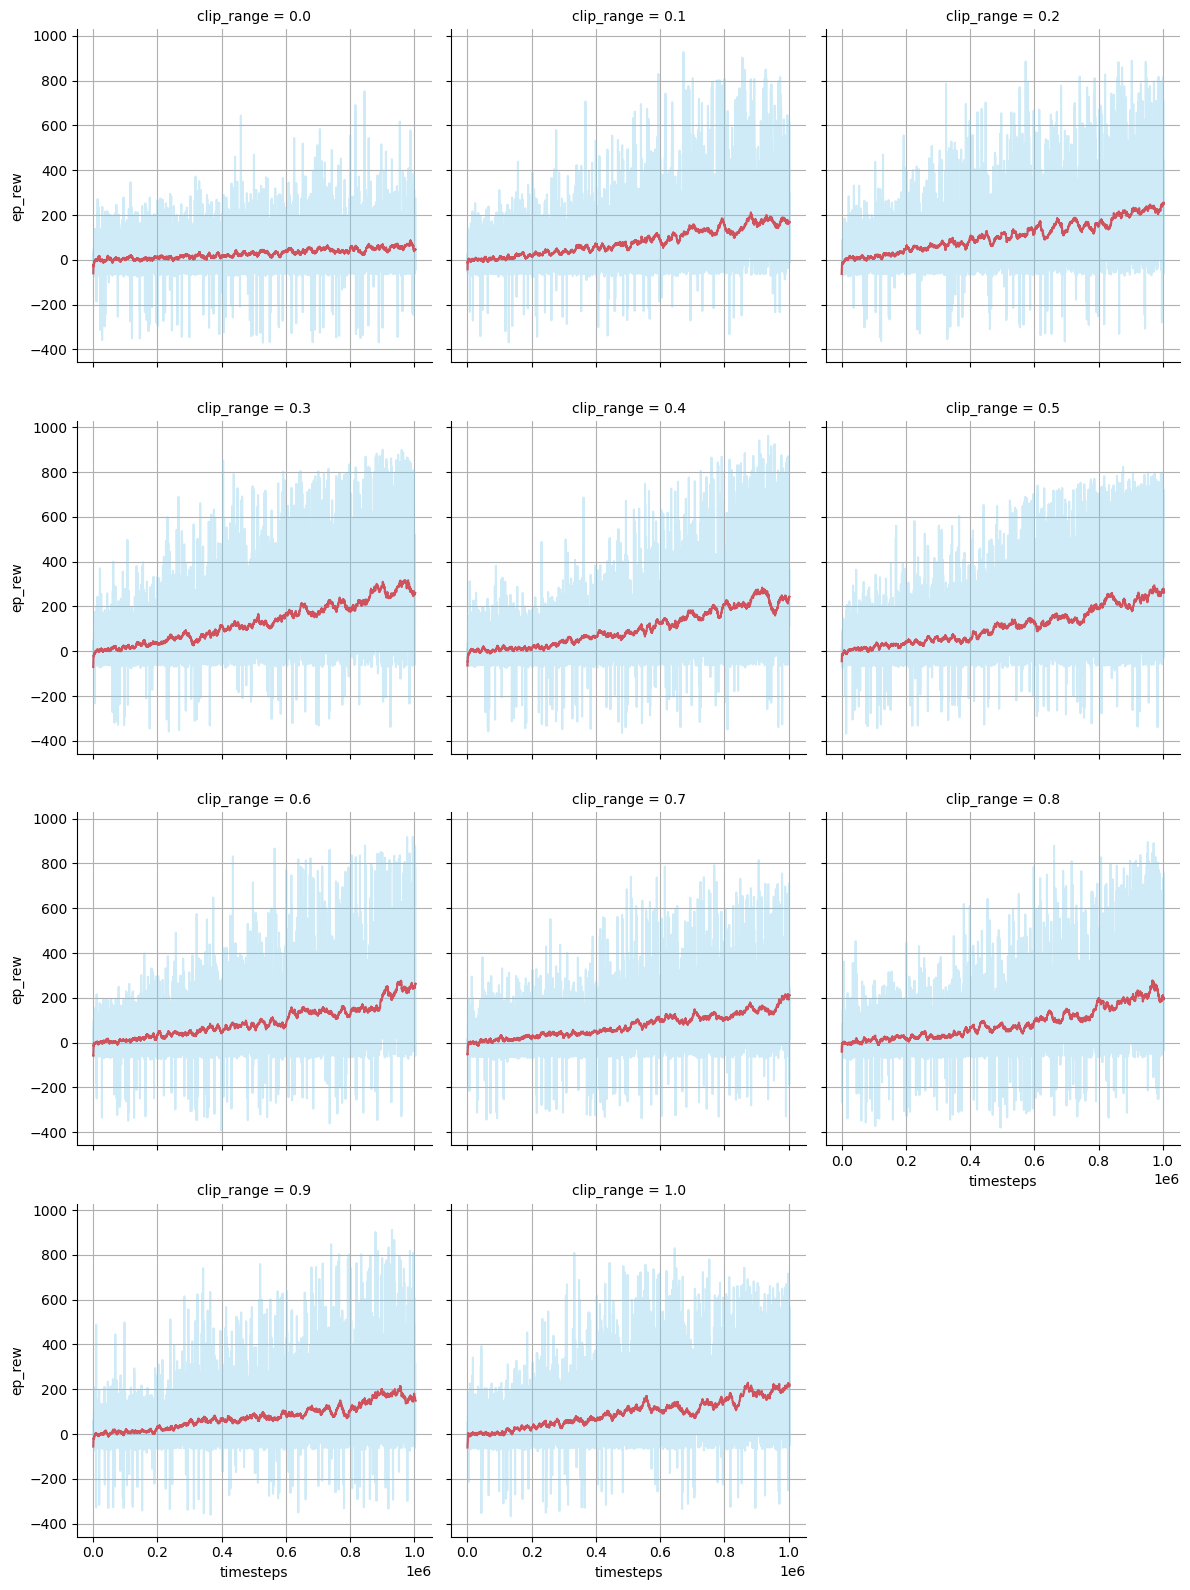

In [2]:


g = sns.FacetGrid(combined_logs, col="clip_range", height=4, aspect=1, col_wrap=3)
g.map_dataframe(cap.rolling_average_lineplot, x_col="timesteps", y_col="ep_rew", timestep_average=100)




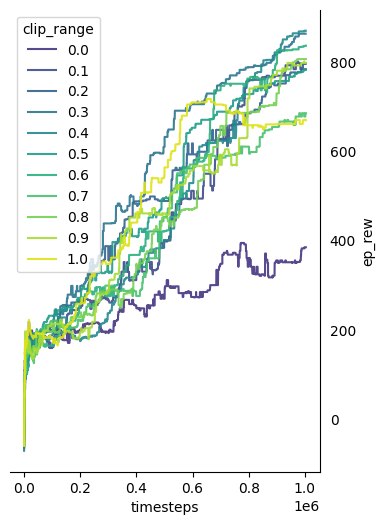

In [11]:

cap.rolling_hue_lineplot(combined_logs, x_col="timesteps", hue="clip_range", y_col="ep_rew", n_values=1000, figsize=(4, 6))
plt.gca().yaxis.set_label_position("right")
plt.gca().yaxis.tick_right()
sns.despine(left=True, right=False, top=True, bottom=False)

<Axes: xlabel='timesteps', ylabel='ep_rew'>

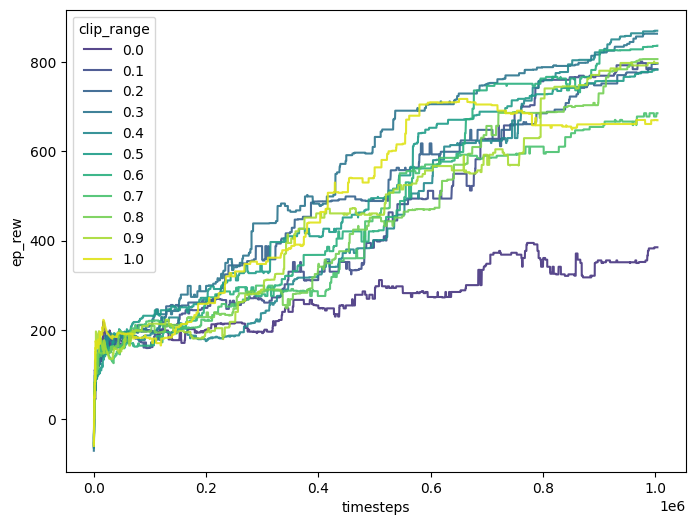

In [4]:
cap.rolling_hue_lineplot(combined_logs, x_col="timesteps", hue="clip_range", y_col="ep_rew", n_values=1000)

